## Videogames

The goal of the project is to choose the most profitable platform.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st 

In [2]:
df=pd.read_csv('/datasets/games.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


We have 16715 entries in the dataset. There are 11 columns. 6 columns are floats, another 5 are strings. There aren't any duplicate rows. 

Let's make column names lowercase.

In [3]:
df.columns = map(str.lower, df.columns)

We have 2 missing values in 'name' column. We definitely could delete this rows.

There are 269 NaNs in 'year_of_release' column. Knowing name of game and platform we could find on internet the year of release of each game to fill missing values, but it doesn't worth it. Just 1% of the data is missing. So we'll delete this rows, using dropna() method. 

In [4]:
df = df.dropna(axis=0, subset=['year_of_release','name'])

Let's convert 'year_of_release' to int type. Thus we could use it as years for further analysis.

In [5]:
df['year_of_release']=df['year_of_release'].astype(int)

Concerning last three columns, 'critic_score' has 50% missing values, 'user_score' and 'rating'  -  40% each column. We cann't just delete all these rows. Possible reason for so many missing values could be the fact that data was taken from open sources.

So let's leave missing values in 'rating' as it is for now. But in 'critic_score' and'user_score' we'll use such approach: fill NaNs with value completely different from values in the column, let's say negative value -1. If we need to calculate for example, mean, we will use condition that will calculate only positive numbers. One more thing - 'tbd' in user_score, here we'll fill it with another negative number -10. After filling NaNs and tbd convert 'user_score' column to float and 'critic_score' to int.

In [6]:
df['critic_score'].fillna('-1',inplace=True)
df['user_score'].fillna('-1',inplace=True)
df['user_score'].replace({'tbd': -10},inplace=True)

In [7]:
df['critic_score']=df['critic_score'].astype(int)
df['user_score']=df['user_score'].astype(float)

Let's add column with total sales for each game: 

In [8]:
df['total_sales']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

##### Now calculate how many games were released in different years.
Divide all years into periods of 3 years each using pd.cut() and count the number of games released in each peroid.

In [9]:
num_of_games=pd.cut(df['year_of_release'],np.arange(df['year_of_release'].min(),df['year_of_release'].max()+1,3))
bar_games=df.groupby(num_of_games)['name'].count()

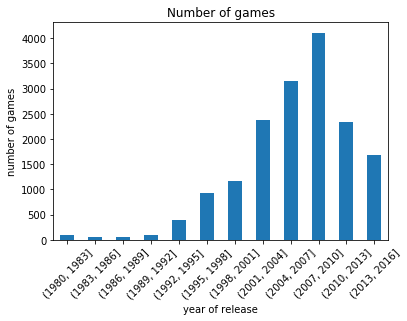

In [10]:
ax=bar_games.plot(kind='bar', rot=45);
ax.set_xlabel('year of release');
ax.set_ylabel('number of games');
plt.title('Number of games');

We can see that there are very few games till 1992. Then the number of games released is increasing each year till 2010, and then decreasing again

##### Let's look at sales for each platform.

In [11]:
sales_per_platform=df.groupby('platform')['total_sales'].sum().reset_index()
sales_per_platform.columns=['platform','sales']
sales_per_platform.head()

,platform,sales
0,2600,86.48
1,3DO,0.10
2,3DS,257.81
3,DC,15.95
4,DS,802.78


Sort the table by sales in descending order and choose the platforms with the greatest total sales. 

In [12]:
sales_per_platform=sales_per_platform.sort_values(by='sales', ascending=False)
sales_per_platform.head(10)

,platform,sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


The first six (PS2-Playstation, X360-Microsoft, PS3-Playstation, Wii-Nintendo, DS-Nintendo, PS-Playstation) have the greatest total sales. For each of them will plot their sales per year.

As we could notice, three of the platforms belong to Playstation. 

In [13]:
PS2=df.query('platform=="PS2"').groupby('year_of_release')['total_sales'].sum()

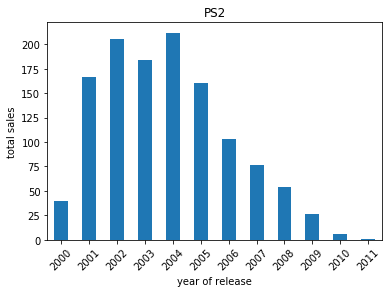

In [14]:
ax=PS2.plot(kind='bar', rot=45);
ax.set_xlabel('year of release');
ax.set_ylabel('total sales');
plt.title('PS2');

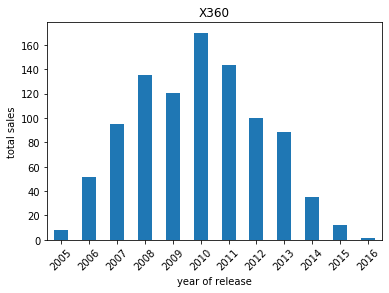

In [15]:
X360=df.query('platform=="X360"').groupby('year_of_release')['total_sales'].sum()
ax=X360.plot(kind='bar', rot=45);
ax.set_xlabel('year of release');
ax.set_ylabel('total sales');
plt.title('X360');

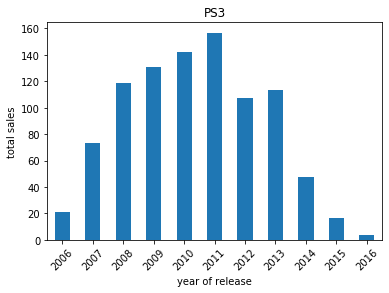

In [16]:
PS3=df.query('platform=="PS3"').groupby('year_of_release')['total_sales'].sum()
ax=PS3.plot(kind='bar', rot=45);
ax.set_xlabel('year of release');
ax.set_ylabel('total sales');
plt.title('PS3');

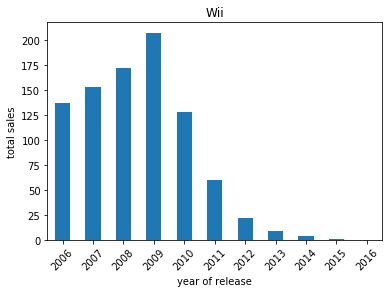

In [17]:
Wii=df.query('platform=="Wii"').groupby('year_of_release')['total_sales'].sum()
ax=Wii.plot(kind='bar', rot=45);
ax.set_xlabel('year of release');
ax.set_ylabel('total sales');
plt.title('Wii');

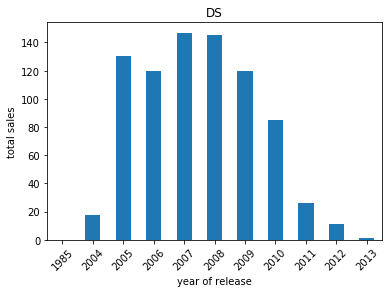

In [18]:
DS=df.query('platform=="DS"').groupby('year_of_release')['total_sales'].sum()
ax=DS.plot(kind='bar', rot=45);
ax.set_xlabel('year of release');
ax.set_ylabel('total sales');
plt.title('DS');

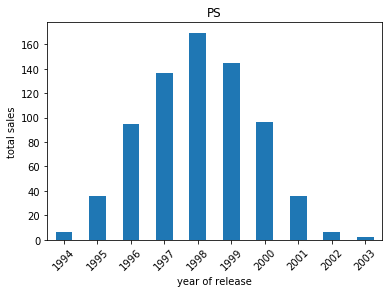

In [19]:
PS=df.query('platform=="PS"').groupby('year_of_release')['total_sales'].sum()
ax=PS.plot(kind='bar', rot=45);
ax.set_xlabel('year of release');
ax.set_ylabel('total sales');
plt.title('PS');

According to the graphs we can see that the lifespan of the platform is about 10 years. After 1-2 years of life platform reaches their popularity (in terms of total sales). Popularity lasts about 5-6 years. And then it takes approximately 3-4 years for platform to disappear. Usually, the reason for disappearing is appearing of a new console (we could see it clearly on Playstation graphs). Popular platforms as PS2, DS, PS  are discontinued and don't have sales in 2016.  

##### According to the information above, we'll take 6 years back (2010-2016) in oder to build prognosis for 2017. 

In [20]:
df_years=df.query('year_of_release>=2010')
df_years.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,-1,-1.0,NaN,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73


##### Let's find which platforms are leading in sales.

In [21]:
platform_sales=df_years.groupby('platform')['total_sales'].sum()
platform_sales=platform_sales.sort_values(ascending=False)
platform_sales=platform_sales.reset_index()
platform_sales

,platform,total_sales
0,PS3,587.74
1,X360,550.41
2,PS4,314.14
3,3DS,257.81
4,Wii,222.97
5,XOne,159.32
6,DS,123.75
7,PC,121.96
8,WiiU,82.19
9,PSP,64.05


From the graphs above we saw that PS3 and X360 were about to disappear. The reason is PS4 and XOne that were released in 2013 and pushed away PS3 and X360 (also see bar plots below). 

DS discontinued in 2013. Its successor is 3DS that were released in 2011 and also is in the direction to desappear.

Wii is about to desappear.

Thus we have two potentially profitable platforms: PS4 and XOne.

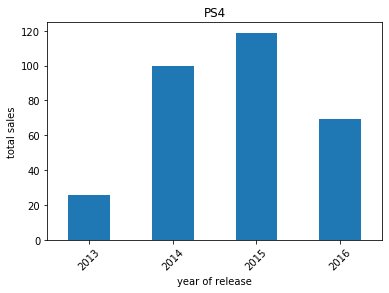

In [22]:
PS4=df_years.query('platform=="PS4"').groupby('year_of_release')['total_sales'].sum()
ax=PS4.plot(kind='bar', rot=45);
ax.set_xlabel('year of release');
ax.set_ylabel('total sales');
plt.title('PS4');

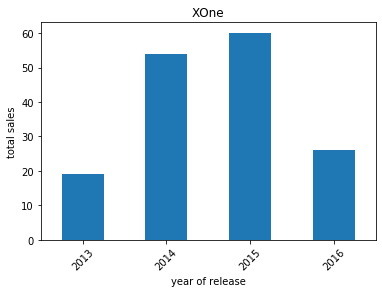

In [23]:
XOne=df_years.query('platform=="XOne"').groupby('year_of_release')['total_sales'].sum()
ax=XOne.plot(kind='bar', rot=45);
ax.set_xlabel('year of release');
ax.set_ylabel('total sales');
plt.title('XOne');

##### Now we"ll build box plot for the global sales of all games, broken down by platform.

(0, 1.25)

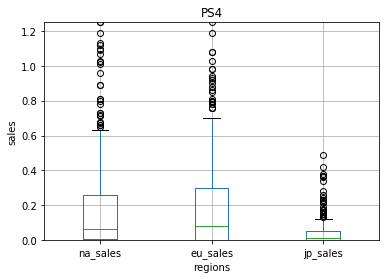

In [24]:
ps4_box_plot=df_years.query('platform=="PS4"')
ax=ps4_box_plot.boxplot(column=['na_sales','eu_sales','jp_sales'])
ax.set_xlabel('regions');
ax.set_ylabel('sales');
plt.title('PS4');
plt.ylim(0,1.25)


We can see that North American and European sales are not significant different, but sales in Japan is significant lower. 

In [25]:
ps4_box_plot[['na_sales','eu_sales','jp_sales']].agg('mean')

na_sales    0.277398
eu_sales    0.359923
jp_sales    0.040714
dtype: float64

The mean is much higher then median, we have right-skewed distribution. It means we have some games with much higher sales then other games that push "mean" up.

(0, 1.25)

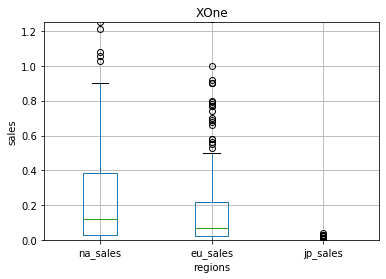

In [26]:
XOne_box_plot=df_years.query('platform=="XOne"')
ax=XOne_box_plot.boxplot(column=['na_sales','eu_sales','jp_sales'])
ax.set_xlabel('regions');
ax.set_ylabel('sales');
plt.title('XOne');
plt.ylim(0,1.25)

For XOne we can see that North American sales is higher then European sales. We almost don't have any sales in Japan. 

In [27]:
XOne_box_plot[['na_sales','eu_sales','jp_sales']].agg('mean')

na_sales    0.377004
eu_sales    0.208866
jp_sales    0.001377
dtype: float64

For XOne, like above for PS4, we have mean is much higher then median.

##### Let's look at how user and professional reviews affect sales for PS4 platform.

In [28]:
critic_score=ps4_box_plot.query('critic_score>0')

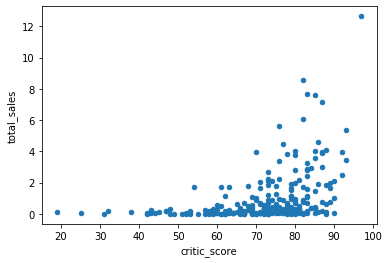

In [29]:
critic_score.sort_values('critic_score').plot(x='critic_score', y='total_sales', kind='scatter');

In [30]:
user_score=ps4_box_plot.query('user_score>0')

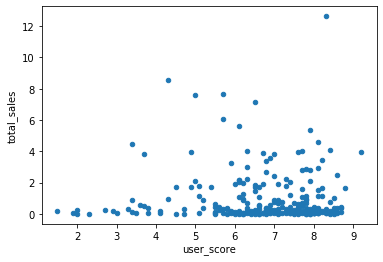

In [31]:
user_score.sort_values('user_score').plot(x='user_score', y='total_sales', kind='scatter');

In [32]:
df['user_score'].corr(df['total_sales'])

0.14026185715977174

In [33]:
df['critic_score'].corr(df['total_sales'])

0.14803268827723012

From the graphs above and correlation coefficient 0.14 we can that there is no relationship between user and professional reviews on sales. For high ratings we can see both high and low sales.

##### Let's compare the sales of the same games on other platforms. In order to do this we need to find games that suit to more then one platform.

In [34]:
same_games=df_years[['name', 'platform', 'total_sales']]
same_games=same_games.groupby(['name','platform']).agg({'total_sales':'sum'})
same_games=same_games.reset_index()
same_games

,name,platform,total_sales
0,Beyblade Burst,3DS,0.03
1,Fire Emblem Fates,3DS,1.67
2,Frozen: Olaf's Quest,3DS,0.59
3,Frozen: Olaf's Quest,DS,0.51
4,Haikyu!! Cross Team Match!,3DS,0.04
...,...,...,...
5271,thinkSMART FAMILY!,Wii,0.03
5272,thinkSMART: Chess for Kids,DS,0.01
5273,uDraw Studio,Wii,2.42
5274,uDraw Studio: Instant Artist,Wii,0.17


Using duplicated() method for 'name' column we can find same game for different platforms. We'll put keep=False in order to see all duplicates.

In [35]:
more_then_one=same_games[same_games.duplicated(['name'], keep=False)]
more_then_one

,name,platform,total_sales
2,Frozen: Olaf's Quest,3DS,0.59
3,Frozen: Olaf's Quest,DS,0.51
20,2010 FIFA World Cup South Africa,PS3,1.23
21,2010 FIFA World Cup South Africa,PSP,0.46
22,2010 FIFA World Cup South Africa,Wii,0.43
...,...,...,...
5267,pro evolution soccer 2011,PSP,0.80
5268,pro evolution soccer 2011,Wii,0.22
5269,pro evolution soccer 2011,X360,0.60
5274,uDraw Studio: Instant Artist,Wii,0.17


Now we'll sort total sales in descending order and use drop_duplicates with keep=first in order to leave duplicates only with max value.

In [36]:
more_then_one=more_then_one.sort_values('total_sales', ascending=False)
more_then_one=more_then_one.drop_duplicates(['name'], keep='first')
more_then_one

,name,platform,total_sales
1703,Grand Theft Auto V,PS3,21.05
599,Call of Duty: Modern Warfare 3,X360,14.73
580,Call of Duty: Black Ops 3,PS4,14.63
577,Call of Duty: Black Ops,X360,14.62
584,Call of Duty: Black Ops II,PS3,13.79
...,...,...,...
114,Akatsuki no Goei Trinity,PSP,0.01
501,Brave: The Video Game,DS,0.01
3481,Prototype: Biohazard Bundle,XOne,0.01
3718,Rocksmith 2014 Edition Remastered,PS4,0.01


Let's find total sales for each platform.

In [37]:
more_then_one.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)

,platform,total_sales
4,PS3,270.38
5,PS4,221.52
10,X360,198.46
8,Wii,95.12
0,3DS,19.49
1,DS,17.22
2,PC,14.25
7,PSV,8.24
11,XOne,7.71
6,PSP,4.26


We can see that Playstation is a leader in sales from games that is released for more then one platform. XOne is in the tail.

##### Let's look at the general distribution of games by genre.

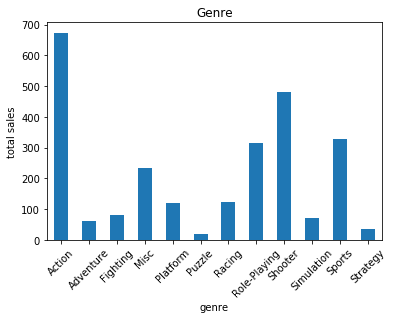

In [38]:
genre=df_years.groupby('genre')['total_sales'].sum()
ax=genre.plot(kind='bar', rot=45);
ax.set_xlabel('genre');
ax.set_ylabel('total sales');
plt.title('Genre');

We can see that the most profitable genres are action, shooter, sports. The less profitable genres are puzzle, strategy. It looks like active games more popular then passive ones. 

##### Let's look at three regions: North America, Europe, Japan. 

* North America.

In [39]:
NA=df_years[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'critic_score', 'user_score', 'rating',
       'total_sales']]
na=NA.groupby('platform')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head()
na

,platform,na_sales
10,X360,334.18
4,PS3,229.25
8,Wii,121.20
5,PS4,108.74
11,XOne,93.12


In [40]:
na['market_shares']=na['na_sales']/NA['na_sales'].sum()
na

,platform,na_sales,market_shares
10,X360,334.18,0.295627
4,PS3,229.25,0.202803
8,Wii,121.20,0.107218
5,PS4,108.74,0.096195
11,XOne,93.12,0.082377


In [41]:
na['market_shares'].sum()

0.7842198848205519

In North America the leader of 5 most popular platforms is X360 by Microsoft. XOne (also by Microsoft) closes the best five platforms. Together they take about 37% of all NA sales. 

PS3 and PS4 by playstation take 29% of all sales and Nintendo with Wii - 11%.

The best five platforms all together take about 78% of all sales in North America.

* Europe

In [42]:
EU=df_years[['name', 'platform', 'year_of_release', 'genre', 'eu_sales', 'critic_score', 'user_score', 'rating',
       'total_sales']]
eu=EU.groupby('platform')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head()
eu

,platform,eu_sales
4,PS3,213.60
10,X360,163.41
5,PS4,141.09
2,PC,68.82
8,Wii,65.91


In [43]:
eu['market_shares']=eu['eu_sales']/EU['eu_sales'].sum()
eu

,platform,eu_sales,market_shares
4,PS3,213.60,0.253920
10,X360,163.41,0.194256
5,PS4,141.09,0.167723
2,PC,68.82,0.081811
8,Wii,65.91,0.078351


In [44]:
eu['market_shares'].sum()

0.776060674504585

However, in Europe leader is Playstation with about 50% of all sales in EU. X360 take 19% and Nintendo only 7%. All together they take 77% of all sales.

* Japan

In [45]:
JP=df_years[['name', 'platform', 'year_of_release', 'genre', 'jp_sales', 'critic_score', 'user_score', 'rating',
       'total_sales']]
jp=JP.groupby('platform')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head()
jp

,platform,jp_sales
0,3DS,100.62
4,PS3,59.26
6,PSP,42.20
1,DS,27.90
7,PSV,21.84


In [46]:
jp['market_shares']=jp['jp_sales']/JP['jp_sales'].sum()
jp

,platform,jp_sales,market_shares
0,3DS,100.62,0.329750
4,PS3,59.26,0.194206
6,PSP,42.20,0.138297
1,DS,27.90,0.091433
7,PSV,21.84,0.071574


In [47]:
jp['market_shares'].sum()

0.8252605361473437

Different situation in Japan. We find only japanese platforms. The leader is Nintendo with 42% of all sales in Japan. But Playstation takes only 2% less (40% of sales). Together they are 82% of all sales in Japan.

##### Let's find top five genres in each region.

In [48]:
na_genre=NA.groupby('genre')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
na_genre.head()

,genre,na_sales
0,Action,290.64
8,Shooter,237.47
10,Sports,156.81
3,Misc,123.80
7,Role-Playing,112.05


In [49]:
eu_genre=EU.groupby('genre')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
eu_genre.head()

,genre,eu_sales
0,Action,233.63
8,Shooter,171.45
10,Sports,116.84
7,Role-Playing,75.48
3,Misc,66.09


In [50]:
jp_genre=JP.groupby('genre')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp_genre.head()

,genre,jp_sales
7,Role-Playing,103.54
0,Action,72.20
3,Misc,24.29
4,Platform,15.81
1,Adventure,15.67


In [51]:
df_years['na_sales'].sum()/df_years['total_sales'].sum()

0.4443016382102317

In [52]:
df_years['eu_sales'].sum()/df_years['total_sales'].sum()

0.33063311637266923

In [53]:
df_years['jp_sales'].sum()/df_years['total_sales'].sum()

0.11993365405779327

We saw above analysing data for all regions that the most popular genres are Action, Shooter, Sports and Role_playing. These genres are the same as five the most popular genres in NA and in EU. It makes sence becuase NA and EU take 77% of all sales together (44%-NA, 33%-EU). So these two dictate popularity. 

Japanese choice is absolutely different. Also cultural differences play role in choosing genres.

##### Let's check if ESRB ratings affect sales in individual regions.

In [54]:
df_years['rating'].isnull().sum()

2164

We have 2164 missing values for 'rating' ESRB. We assume that if there is NaN in rating column it means that the rating is "E" - everyone and there aren't any age restrictions. 

Thus, we'll fill missing values in rating column with 'E'. 

In [55]:
df_years['rating'].fillna('E',inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [56]:
na_rating=NA.groupby('rating')['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
na_rating.head()

,rating,na_sales
3,M,382.22
0,E,271.15
5,T,160.81
1,E10+,159.38
2,EC,1.13


In [57]:
eu_rating=EU.groupby('rating')['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
eu_rating.head()

,rating,eu_sales
3,M,292.04
0,E,197.34
5,T,113.08
1,E10+,99.28
4,RP,0.03


In [58]:
jp_rating=JP.groupby('rating')['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)
jp_rating.head()

,rating,jp_sales
0,E,47.87
5,T,42.11
3,M,30.45
1,E10+,13.22
2,EC,0.00


In both regions (NA and EU) rating 'M' (ages 17 and up) the most profitable.Than goes rating 'E' - everyone and after it - 'T'.  In Japan these three ratings are also popular, but in a different popularity level then two other regions.

##### Let's check some hypotheses.

Null hypotheses: Average user ratings of the Xbox One and PC platforms are the same. 

Alternative hypotheses: Average user ratings of the Xbox One and PC platforms are different. 

In our case we have two different statistical populations. Let's set a critical statistical significance level to 0.05 and equal_var parameter to False. We assume that variences of our populations are not equal. We will use two sample t test. 

We'll test our hypotheses applying the method scipy.stats.ttest_ind().

If p-value less than ∝ we reject our Null hypotheses, otherwise we can't reject the Null hypotheses.

In [59]:
Xbox_One=df_years.query('platform=="XOne" & user_score>=0')
PC=df_years.query('platform=="PC" & user_score>=0')

We need to use user_score>=0, because we filled NaN with -1 and tbd with -10.

In [60]:
alpha = 0.05

results = st.ttest_ind(Xbox_One['user_score'], PC['user_score'], equal_var = False)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  0.9801634129117883
We can't reject the null hypothesis


So we can conclude with confidence level of 0.05 that average user ratings of the Xbox One and PC platforms are the same.

Let's check another hypotheses:

Null hypotheses: Average user ratings for the Action and Sports genres are equal.

Alternative hypotheses: Average user ratings for the Action and Sports genres are different.

Again, we are dealing with two different statistical populations. Set a critical statistical significance level to 0.05 and equal_var parameter to False. We will use two sample t test. 

In [61]:
Action=df_years.query('genre=="Action" & user_score>=0')
Sports=df_years.query('genre=="Sports" & user_score>=0')

In [62]:
alpha = 0.05

results = st.ttest_ind(Action['user_score'], Sports['user_score'], equal_var = False)
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value:  1.4516152467844418e-15
We reject the null hypothesis


The p-value is less than 0.05, we reject the null hypotheses and conclude that there is difference between average user ratings for the Action and Sports genres. 

#### Analysing data from 2010 in order to build a prognosis for 2017, I would suggest to choose PS4 console as potentially the most profitable platform. PS4 that released in 2013 is a successor of PS3.  As we saw that PS3 was a leader in sales also a leader in sales from games that were released for more then one platform. PS3 took first place in sales in Europe, second places in North America and Japan. But PS3 is about to disappear. And here is PS4 console coming. People would like to upgrade their existing version and continue to buy Playstation.